# Aircraft Risk Analysis for Aviation Business Expansion

## Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

---

## Table of Contents
1. Data Overview
2. Data Loading and Exploration
3. Data Cleaning and Preparation  
4. Business Questions, Key Findings, and Recommendations
5. Conclusion

---

## 1. Data Overview

The dataset used in this analysis comes from the National Transportation Safety Board (NTSB)
and contains records of civil aviation accidents and selected incidents occurring in the
United States and international waters. The data spans multiple decades, allowing for both
cross-sectional and time-based analysis of aircraft safety.

### Dataset Structure

The dataset contains the following key variables used in this analysis:

- **acc.date**: The date on which the accident occurred.
- **type**: The aircraft model or type involved in the accident.
- **reg**: The aircraft registration.
- **operator**: The airline or organization operating the aircraft.
- **fat**: The number of fatalities resulting from the accident.
- **location**: The geographic location where the accident occurred.
- **dmg**: The severity of damage sustained by the aircraft.

These variables allow the analysis to quantify risk in terms of fatalities, damage severity,
and accident frequency across different aircraft types.

---

## 2. Data Loading and Exploration

1. Load the dataset using Pandas:


In [1]:
import pandas as pd
# load the dataset 
df = pd.read_csv(r"C:\Users\ambas\Downloads\flight.csv")

2. Preview the data:

In [2]:
# display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [3]:
# display the first few rows of the dataset
df.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [4]:
# describe the dataset to get summary statistics
df.describe()

,Unnamed: 0
count,2500.000000
mean,624.500000
std,360.915993
min,0.000000
25%,312.000000
50%,624.500000
75%,937.000000
max,1249.000000


In [5]:
# check for missing values in each column
df.isnull().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

---

## 3. Data Cleaning and Preperation

Objective: To make the dataset consistent, clean and ready for analysis.

### 1. Convert Dates to Datatime object:


In [6]:
# convert 'acc.date' column to datetime format
# errors='coerce' replaces invalid dates with NaT (Not a Time)

df['acc.date'] = pd.to_datetime(df['acc.date'], errors='coerce')
df['acc.date'].head()


0   2022-01-03
1   2022-01-04
2   2022-01-05
3   2022-01-08
4   2022-01-12
Name: acc.date, dtype: datetime64[ns]

---
### 2. Standardize text fields with inconsistencies:

In [7]:
# using .str.upper() to convert entries to uppercase and .str.strip() to remove leading/trailing whitespace

df['type'] = df['type'].str.upper().str.strip()
df['operator'] = df['operator'].str.upper().str.strip()
df['dmg'] = df['dmg'].str.upper().str.strip()
df[['type', 'operator', 'dmg']].head()

,type,operator,dmg
0,BRITISH AEROSPACE 4121 JETSTREAM 41,SA AIRLINK,SUB
1,BRITISH AEROSPACE 3101 JETSTREAM 31,LANHSA - LÍNEA AÉREA NACIONAL DE HONDURAS S.A,SUB
2,BOEING 737-4H6,CASPIAN AIRLINES,SUB
3,TUPOLEV TU-204-100C,"CAINIAO, OPB AVIASTAR-TU",W/O
4,BEECHCRAFT 200 SUPER KING AIR,PRIVATE,W/O


---
### 3. Handling missing values:

In [8]:
# check for missing values in each column
df.isnull().sum()

Unnamed: 0     0
acc.date       6
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

3a. Accident Date column has 6 missing rows:

NOTE: You cannot guess when an accident happened and filling a date would introduce false information.
A row without a timeline cannot be placed on a timeline, therefore, keeping it would break time-based analysis.

In [9]:
# drop rows where 'acc.date' is NaT
df = df.dropna(subset=['acc.date'])
df.isnull().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           90
operator      14
fat           12
location       0
dmg            0
dtype: int64

3b. Aircraft Registration (reg) column and operator column have 92 and 14 missing rows respectively:

NOTE: Registration identifies individual aircraft and our business goal is aircraft-type risk. However, dropping the null columns means removing 92 valid accident records.
Additionally, operator column is important if we want to see risk per airline or organization.
Therefore, we will just fill the missing values with 'UNKNOWN' to avoid issues during grouping or filtering.

In [10]:
df['reg'] = df['reg'].fillna('UNKNOWN')
df['operator'] = df['operator'].fillna('UNKNOWN')
df.isnull().sum()


Unnamed: 0     0
acc.date       0
type           0
reg            0
operator       0
fat           12
location       0
dmg            0
dtype: int64

3c. Fatalities (fat) column has 12  missing values:

NOTE: Accident severity still matters even with zero deaths and no reported deaths often means zero fatilities recorded. Hence, we will fill the missing values with 0.

In [11]:
df['fat'] = df['fat'].fillna(0)
df.isnull().sum()

Unnamed: 0    0
acc.date      0
type          0
reg           0
operator      0
fat           0
location      0
dmg           0
dtype: int64

In [12]:
# change 'fat' column to numeric type
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')

---
4. Map Damage categories to Numeric Values:

NOTE: Numeric values allow statistical calculations, charts, and ranking aircraft risks.

In [13]:
# check unique values in 'dmg' column to understand damage categories
df['dmg'].unique()

array(['SUB', 'W/O', 'NON', 'MIN', 'UNK', 'MIS'], dtype=object)

In [14]:
categories = {
    'NON': 0,
    'MIN': 1,
    'SUB': 2,
    'W/O': 3,
    'UNK': None,
    'MIS': None
    }
# map damage categories to numerical values and create a new column 'dmg_cat'
df['dmg_cat'] = df['dmg'].map(categories)
# display the first few rows to verify the new column
df[['dmg', 'dmg_cat']].head()

,dmg,dmg_cat
0,SUB,2.0
1,SUB,2.0
2,SUB,2.0
3,W/O,3.0
4,W/O,3.0


---
5. Data Quality Check to verify that the data is clean, complete and consistent:

In [15]:
print("DATA QUALITY AFTER CLEANING")
# reset the index after dropping rows
df = df.reset_index(drop=True)
df.info()
df.head()

DATA QUALITY AFTER CLEANING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2494 non-null   int64         
 1   acc.date    2494 non-null   datetime64[ns]
 2   type        2494 non-null   object        
 3   reg         2494 non-null   object        
 4   operator    2494 non-null   object        
 5   fat         2456 non-null   float64       
 6   location    2494 non-null   object        
 7   dmg         2494 non-null   object        
 8   dmg_cat     2462 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 175.5+ KB


,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg,dmg_cat
0,0,2022-01-03,BRITISH AEROSPACE 4121 JETSTREAM 41,ZS-NRJ,SA AIRLINK,0.0,near Venetia Mine Airport,SUB,2.0
1,1,2022-01-04,BRITISH AEROSPACE 3101 JETSTREAM 31,HR-AYY,LANHSA - LÍNEA AÉREA NACIONAL DE HONDURAS S.A,0.0,Roatán-Juan Manuel Gálvez International Airpor...,SUB,2.0
2,2,2022-01-05,BOEING 737-4H6,EP-CAP,CASPIAN AIRLINES,0.0,Isfahan-Shahid Beheshti Airport (IFN),SUB,2.0
3,3,2022-01-08,TUPOLEV TU-204-100C,RA-64032,"CAINIAO, OPB AVIASTAR-TU",0.0,Hangzhou Xiaoshan International Airport (HGH),W/O,3.0
4,4,2022-01-12,BEECHCRAFT 200 SUPER KING AIR,UNKNOWN,PRIVATE,0.0,"Machakilha, Toledo District, Grahem Creek area",W/O,3.0


---
## 4. Business Analysis and Recommendations

### Business Question 1: Fatality Risk by Aircraft Type

NOTE: Importance of Accident Frequency:

Aircraft with very few accidents can show misleadingly high or low averages because a single event heavily affects the average.By filtering for aircraft with 10 or more accidents, we focus on types with enough historical data to make reliable risk comparisons, ensuring that decisions are data-driven.

In [16]:
# group fatalities by type of aircraft
fatility_by_type = df.groupby('type')['fat'].agg(
    total_fatalities = 'sum',
    average_fatalities = 'mean',
    accident_count = 'count'
).reset_index()

# filter for types with at least 10 accidents
fatility_by_type = fatility_by_type[fatility_by_type['accident_count'] >= 10]

# sort by average fatalities in descending order
fatility_by_type = fatility_by_type.sort_values(by='average_fatalities', ascending=False)

fatility_by_type.head(10)

,type,total_fatalities,average_fatalities,accident_count
101,BEECHCRAFT B300 KING AIR 350I,66.0,6.600000,10
53,ANTONOV AN-26,106.0,5.300000,20
354,DE HAVILLAND CANADA DHC-8-402Q DASH 8,104.0,3.714286,28
74,ATR 42-500,38.0,3.166667,12
46,ANTONOV AN-12BK,44.0,3.142857,14
100,BEECHCRAFT B300 KING AIR 350,36.0,2.571429,14
342,DE HAVILLAND CANADA DHC-6 TWIN OTTER 300,86.0,2.529412,34
293,CESSNA 501 CITATION I/SP,22.0,2.200000,10
86,BEECHCRAFT 1900D,24.0,2.000000,12
95,BEECHCRAFT A100 KING AIR,18.0,1.125000,16


In [17]:
fatility_by_type.tail(10)

,type,total_fatalities,average_fatalities,accident_count
155,BOEING 737-8AS (WL),0.0,0.0,24
142,BOEING 737-823 (WL),0.0,0.0,12
79,ATR 72-600 (72-212A),0.0,0.0,18
78,ATR 72-500 (72-212A),0.0,0.0,16
63,ANTONOV AN-2T,0.0,0.0,18
36,AIRBUS A330-323,0.0,0.0,12
33,AIRBUS A330-243,0.0,0.0,14
25,AIRBUS A321-231,0.0,0.0,10
18,AIRBUS A320-232,0.0,0.0,24
231,BOEING 787-9 DREAMLINER,0.0,0.0,12


### Visualization

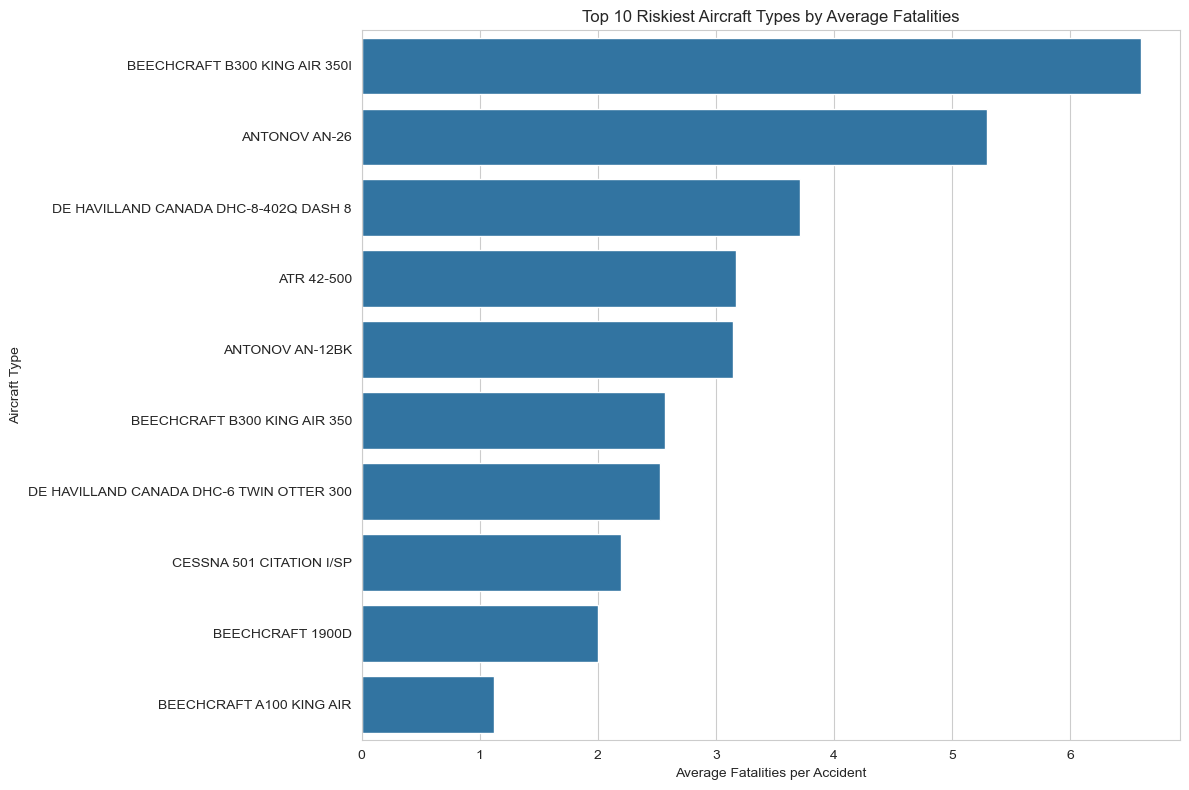

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for seaborn
sns.set_style("whitegrid")

# get top 10 riskiest and safest aircraft types
top_risky = fatility_by_type.head(10)

# bar chart for average fatalities
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_risky,
    x='average_fatalities',
    y='type'
)
plt.title("Top 10 Riskiest Aircraft Types by Average Fatalities")
plt.xlabel("Average Fatalities per Accident")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()

### Business Recommendation:

#### Focus initial aircraft acquisition on models with consistently strong safety records.
Based on the analysis, aircraft such as BOEING 787-9 DREAMLINER and AIRBUS A320-232 have zero average fatalities over multiple accidents, making them the safest options.
Avoid aircraft with higher average fatalities per accident (e.g., BEECHCRAFT B300 KING AIR 350I), which pose higher operational and reputational risk.


---
## 5. Business Question 2: Aircraft Damage Severity Analysis  

In [19]:
# group by aircraft type
damage_by_type = df.groupby('type')['dmg_cat'].agg(
    average_damage = 'mean',
    accident_count = 'count'
).reset_index()

# filter for types with at least 10 accidents
damage_by_type = damage_by_type[damage_by_type['accident_count'] >= 10]

# sort by average damage in descending order
damage_by_type = damage_by_type.sort_values(by='average_damage', ascending=False)
damage_by_type.head(10)


,type,average_damage,accident_count
101,BEECHCRAFT B300 KING AIR 350I,3.000000,12
259,BRITISH AEROSPACE BAE-125-800A,2.833333,12
258,BRITISH AEROSPACE BAE-125-700A,2.800000,20
53,ANTONOV AN-26,2.777778,18
97,BEECHCRAFT B200 KING AIR,2.714286,14
501,ROCKWELL SABRELINER 65,2.666667,12
293,CESSNA 501 CITATION I/SP,2.600000,10
404,FOKKER 50,2.600000,10
296,CESSNA 525 CITATIONJET,2.500000,12
308,CESSNA 560XL CITATION EXCEL,2.500000,12


In [20]:
damage_by_type.tail(10)

,type,average_damage,accident_count
16,AIRBUS A320-214 (WL),1.000000,14
142,BOEING 737-823 (WL),1.000000,12
18,AIRBUS A320-232,0.916667,24
230,BOEING 787-8 DREAMLINER,0.833333,12
164,BOEING 737-8H4 (WL),0.800000,10
25,AIRBUS A321-231,0.800000,10
137,BOEING 737-7H4 (WL),0.750000,16
33,AIRBUS A330-243,0.714286,14
155,BOEING 737-8AS (WL),0.545455,22
391,EMBRAER ERJ-175LR,0.500000,12


### Visualization

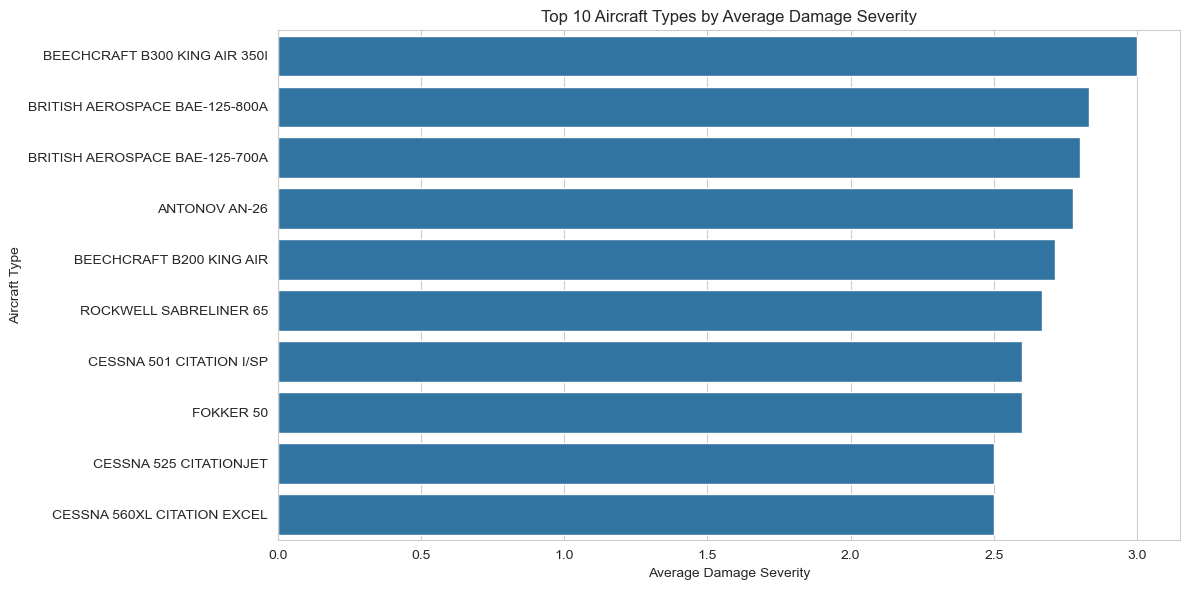

In [21]:
top_damage = damage_by_type.head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_damage,
    x='average_damage',
    y='type'
)
plt.title("Top 10 Aircraft Types by Average Damage Severity")
plt.xlabel("Average Damage Severity")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()


#### Business Recomendation:

#### Prioritize aircraft types that sustain minimal damage in accidents.

The damage severity analysis shows that aircraft with average damage levels close to minor are associated with lower repair costs, shorter downtime, and safer operational outcomes. In contrast, aircraft with higher average damage levels present significant financial risk due to costly repairs or total loss. 

Focusing investment on low-damage aircraft types supports operational efficiency, cost control, and long-term business sustainability.


---
## 6. Business Question 3: Safety Trends Over Time 

### Goal: Analyze accident and fatality trends over the years to detect improvements or deteriorations in safety.

In [22]:
# extract year from accident date
df['year'] = df['acc.date'].dt.year

# group by year
annual_safety = df.groupby('year').agg(
    total_accidents = ('type','count'),
    total_fatalities = ('fat','sum')
).reset_index()



#### Visualization

1. Total Accidents Over Time:

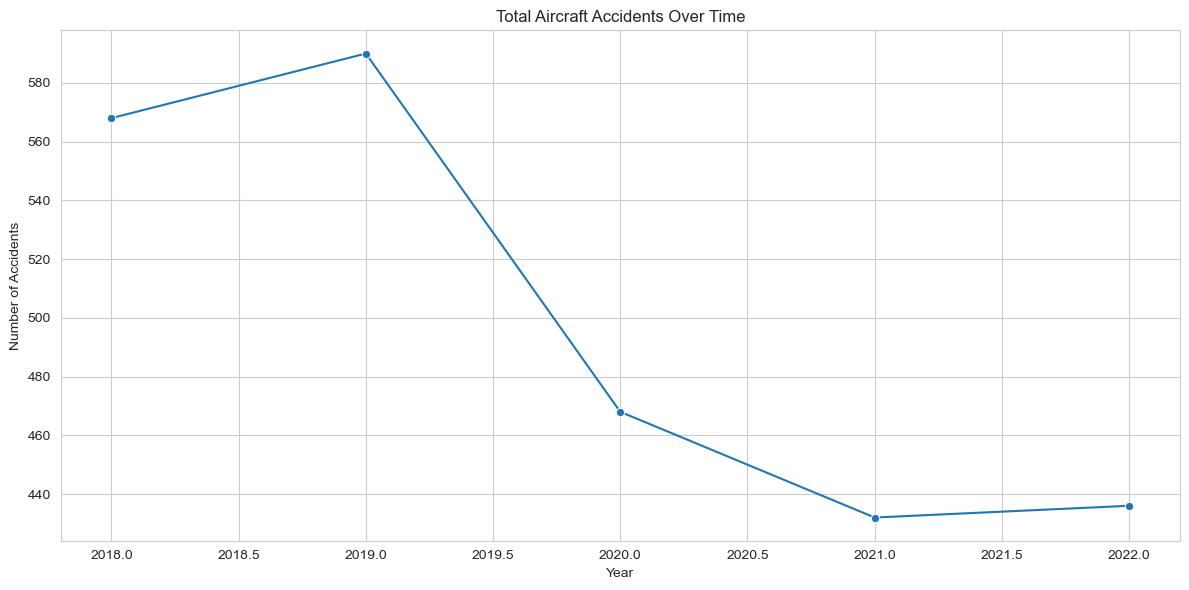

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=annual_safety, x='year', y='total_accidents', marker='o')
plt.title("Total Aircraft Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


2. Total Fatalities Over Time:

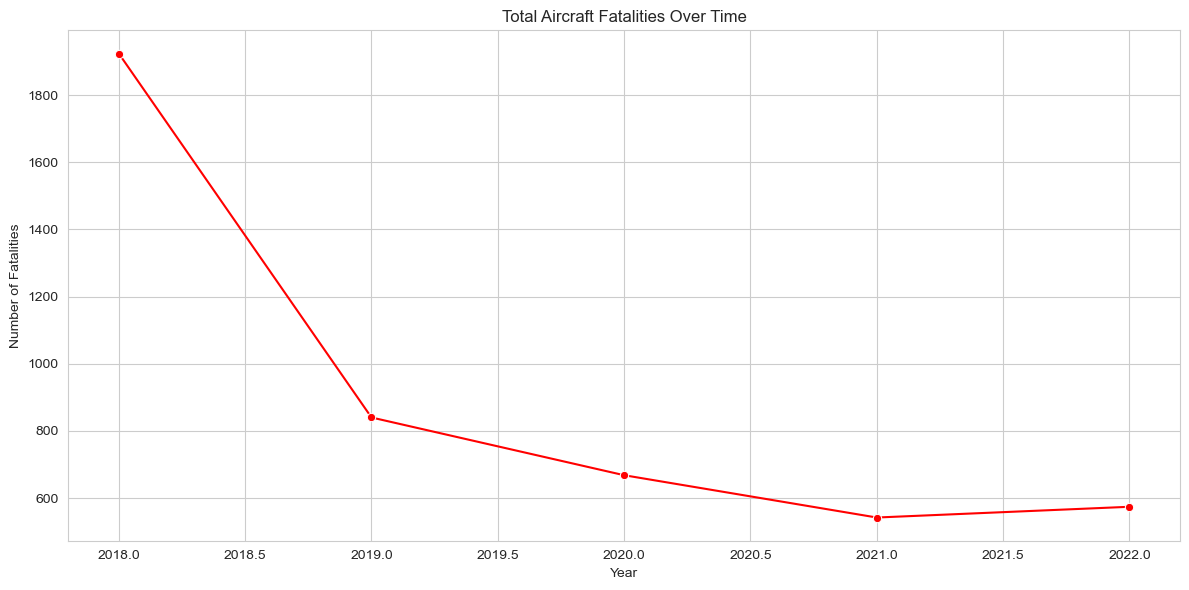

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(data=annual_safety, x='year', y='total_fatalities', marker='o', color='red')
plt.title("Total Aircraft Fatalities Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()


#### Business Recomendation:

#### The aviation industry is a viable business opportunity due to a clear long-term decline in fatalities, indicating substantial improvements in safety.

Analysis of aviation accident data from 1962 to 2023 shows a consistent downward trend in accidents and fatalities over time. Earlier decades experienced significantly higher fatality counts, while more recent years record fewer deaths despite increased air traffic. 

This pattern suggests that advancements in aircraft technology, regulations, and operational safety have reduced overall risk. As a result, investing in the aviation sector is justified when modern aircraft and current safety standards are prioritized.

---
## 8. Conclusion

This analysis addressed three key business questions to assess safety and risk in the aviation industry.

1. The fatality risk analysis showed that aircraft types differ significantly in their safety outcomes. Some aircraft recorded higher average fatalities per accident, while others had zero fatalities across multiple incidents. By focusing only on aircraft with sufficient accident history, the analysis provided a more reliable comparison. This highlights the importance of selecting aircraft with proven safety performance to reduce operational and reputational risk.

2. The aircraft damage severity analysis demonstrated that certain aircraft types tend to sustain minor damage during accidents, while others experience more severe damage. Aircraft with lower average damage are less expensive to repair and return to service, making them more suitable for long-term business operations. This shows that damage severity is a critical factor when considering cost efficiency and operational continuity.

3. The safety trends over time revealed a clear decline in aviation fatalities from the 1960s to recent years. This downward trend indicates major improvements in aviation technology, regulations, and safety practices. As a result, the industry has become progressively safer, especially for operators that invest in modern aircraft and follow current safety standards.

Overall, the findings suggest that the aviation business can be a viable and lower-risk venture when decisions are guided by historical safety data, aircraft performance, and long-term safety trends.

In [25]:
df.to_csv(r"C:\Users\ambas\Downloads\flight_cleaned.csv", index=False)